In [2]:
# Import packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)







import torch  # https://pytorch.org
import torchvision  # https://pytorch.org
#torch.set_printoptions(profile="full")

import os, cv2, itertools # cv2 -- OpenCV
import shutil
import zipfile
%matplotlib inline


In [3]:
save_folder = "/content/drive/MyDrive/Research/Quanvolution"

# MNIST

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 34318399.34it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1240597.83it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9265949.24it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3750104.09it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



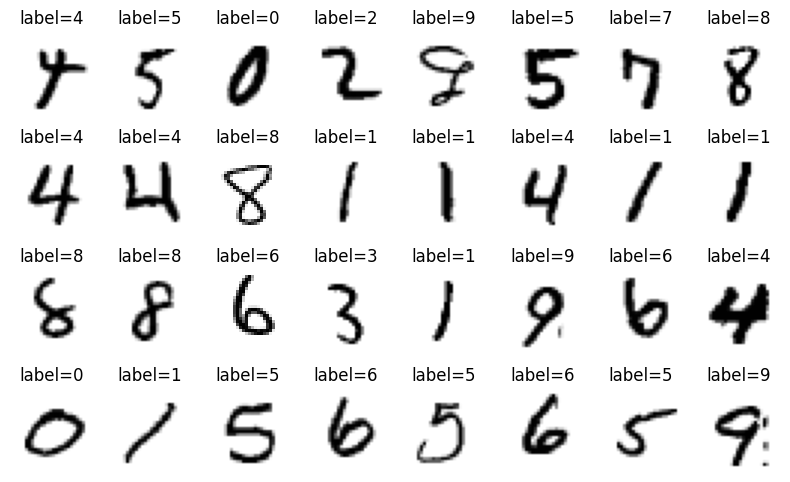

In [4]:
#from torchvision import datasets, transforms
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = torchvision.datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Step 2: Get a batch of images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Step 3: Display the images
# Choose how many images you want to display
n_images = 32

# Set up the figure size
fig = plt.figure(figsize=(8,5))

# Display images in a grid
for idx in range(n_images):
    plt.subplot(4,8, idx+1)  # Adjust the grid size based on your choice of n_images
    plt.imshow(images[idx].numpy().squeeze(), cmap='gray_r')
    plt.title(f"label={labels[idx].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
fig.savefig(os.path.join(save_folder, 'mnist.pdf'))

# FashionMNIST


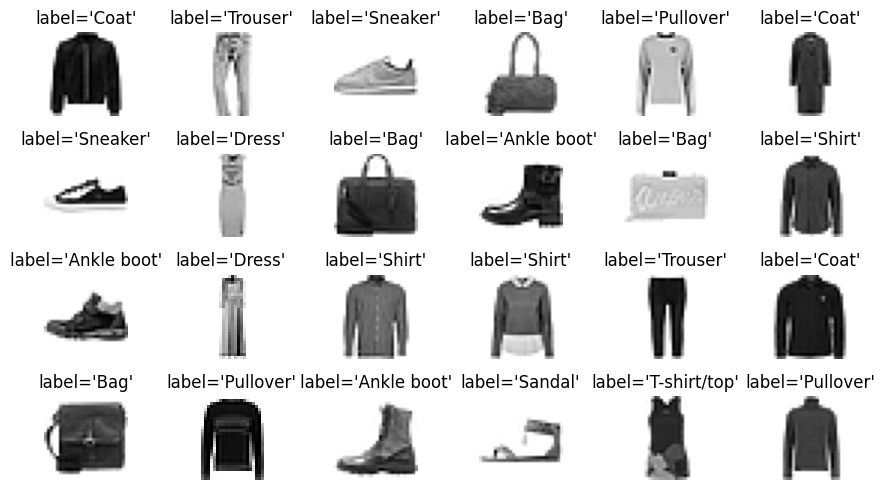

In [14]:
#from torchvision import datasets, transforms
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = torchvision.datasets.FashionMNIST('~/.pytorch/FashionMNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Step 2: Get a batch of images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Step 3: Display the images
# Choose how many images you want to display
n_images = 24

# Set up the figure size
fig = plt.figure(figsize=(9,5))

# Display images in a grid
for idx in range(n_images):
    plt.subplot(4, 6, idx+1)  # Adjust the grid size based on your choice of n_images
    plt.imshow(images[idx].numpy().squeeze(), cmap='gray_r')
    plt.title(f"label='{classes[labels[idx].item()]}'")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
fig.savefig(os.path.join(save_folder, 'fashion-mnist.pdf'))

# CIFAR10

Files already downloaded and verified


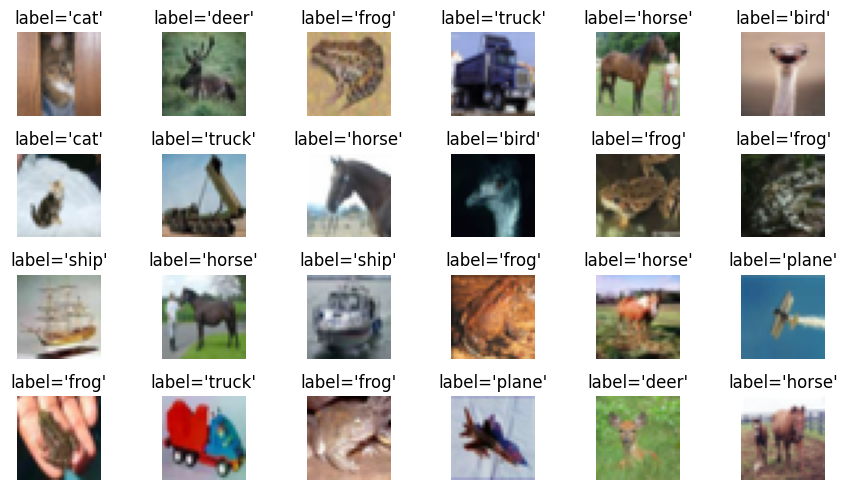

In [17]:
#from torchvision import datasets, transforms
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize((0.5,), (0.5,))
                                ])

# Download and load the training data
trainset = torchvision.datasets.CIFAR10('~/.pytorch/CIFAR10_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Step 2: Get a batch of images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Step 3: Display the images
# Choose how many images you want to display
n_images = 24
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# Set up the figure size
fig = plt.figure(figsize=(9, 5))

# Display images in a grid
for idx in range(n_images):
    plt.subplot(4, 6, idx+1)  # Adjust the grid size based on your choice of n_images
    npimg = images[idx].numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(f"label='{classes[labels[idx].item()]}'")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
fig.savefig(os.path.join(save_folder, 'cifar10.pdf'))